In [1]:
import pandas as pd
import numpy as np 
from matplotlib import pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
import seaborn as sns

In [27]:
covid_cases_by_day = pd.read_csv('cases-by-day.csv')
cases_by_boro = pd.read_csv("by-boro.csv")
rent_prices = pd.read_csv('medianAskingRent_All.csv')
rent_prices.rename(columns={"Attribute" : "Date", "Value" : "Median_Rent"}, inplace=True)

C:\Users\jackc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='date_of_interest', ylabel='CASE_COUNT_7DAY_AVG'>

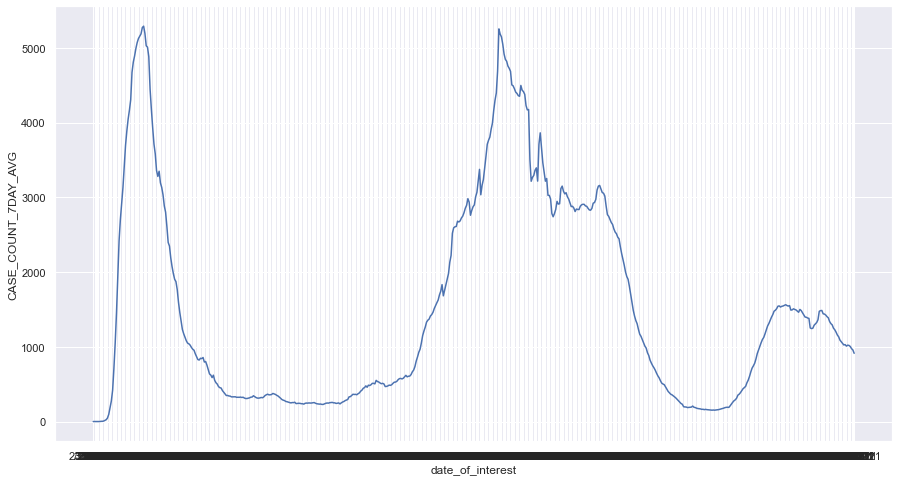

In [19]:
##Graph to look at all covid cases in NYC since the start of Covid

dates_to_plot =covid_cases_by_day['date_of_interest']
covid_cases_to_plot = covid_cases_by_day['CASE_COUNT_7DAY_AVG']

sns.set(rc = {'figure.figsize':(15,8)})
sns.lineplot(dates_to_plot, covid_cases_to_plot)

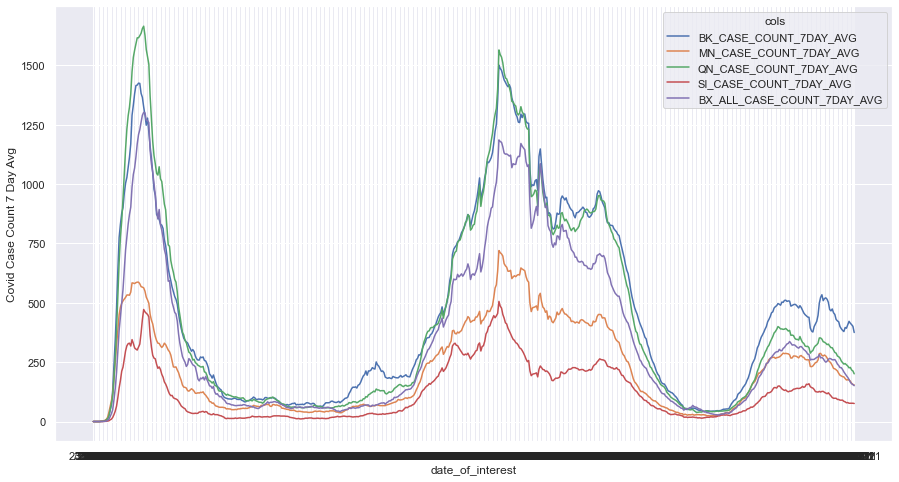

In [64]:
## Separate the data out by Borough 

boro_to_plot = covid_cases_by_day[["date_of_interest","BK_CASE_COUNT_7DAY_AVG","MN_CASE_COUNT_7DAY_AVG", 'QN_CASE_COUNT_7DAY_AVG',
'SI_CASE_COUNT_7DAY_AVG', 'BX_ALL_CASE_COUNT_7DAY_AVG' ]]
boro_to_plot.head()

#Melt the dataframe -- this is making the column headers of the different boroughs row values instead
boro_to_plot = boro_to_plot.melt('date_of_interest', var_name='Boroughs' , value_name='Covid Case Count 7 Day Avg')

##Graph the above values
sns.set(rc = {'figure.figsize':(15,8)})
g = sns.lineplot(x='date_of_interest', y='Covid Case Count 7 Day Avg', hue = 'Boroughs' , data = boro_to_plot)


C:\Users\jackc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Date', ylabel='Median_Rent'>

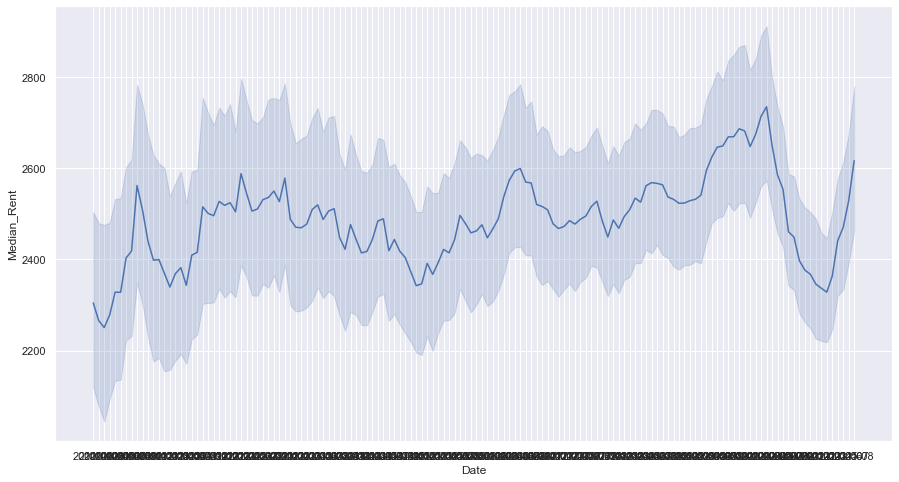

In [29]:
rent_prices.head()
sns.set(rc = {'figure.figsize':(15,8)})
sns.lineplot(rent_prices['Date'], rent_prices['Median_Rent'])

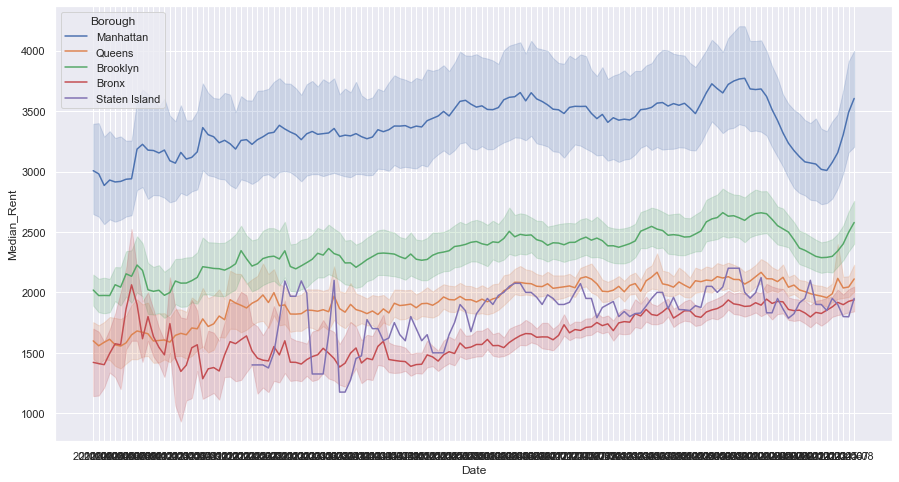

In [63]:
##Graph covid cases borough
median_rents_by_boro = rent_prices[['Date', 'Borough' , 'Median_Rent']]

# sns.set(rc = {'figure.figsize':(15,8)})
# g = sns.lineplot(median_rents_by_boro['Date'] , median_rents_by_boro['Median_Rent'])
g = sns.lineplot(x='Date', y='Median_Rent', hue = 'Borough' , data = median_rents_by_boro)
